# Explore here

In [84]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
# clustering
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# metricas
from sklearn.metrics import silhouette_score

# reduccion de dimensionalidad
from sklearn.decomposition import PCA

import warnings

In [85]:
warnings.filterwarnings('ignore')

In [118]:
rawdata = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')

rawdata.head()
rawdata.shape

(20640, 9)

In [87]:
rawdata.to_csv('../data/raw/rawdata.csv')

In [88]:
df = rawdata[['MedInc', 'Latitude', 'Longitude']]
df.head()

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25


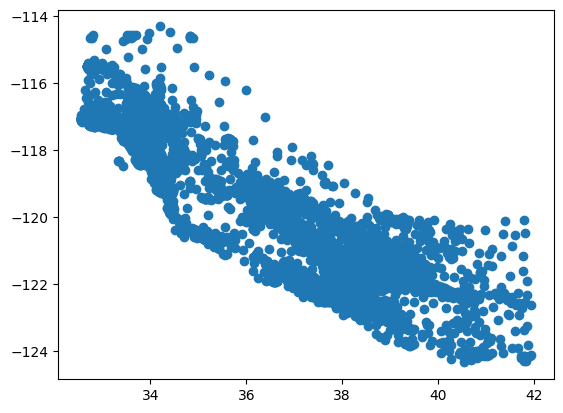

In [89]:
plt.scatter(rawdata['Latitude'], rawdata['Longitude'])
plt.show()

In [90]:
X = df

X_train, X_test = train_test_split(X, test_size=0.2, random_state=21)

X_train

,MedInc,Latitude,Longitude
12055,2.3036,33.88,-117.57
10018,5.2359,39.23,-121.20
3794,4.4122,34.16,-118.37
162,3.6750,37.81,-122.24
13436,2.3682,34.09,-117.44
...,...,...,...
16432,3.9500,38.12,-121.23
8964,5.1322,33.99,-118.39
5944,4.0023,34.13,-117.88
5327,3.6673,34.04,-118.45


In [91]:
X_test

,MedInc,Latitude,Longitude
18726,1.6033,40.58,-122.30
1046,2.5250,38.38,-120.72
15508,4.2357,33.14,-117.08
828,5.6400,37.62,-122.08
19007,2.4330,38.36,-121.98
...,...,...,...
17027,6.1004,37.51,-122.29
19373,3.7031,37.81,-120.90
6129,3.5625,34.08,-117.99
5466,3.0150,33.99,-118.47


### Instrucciones

1. Construir un K-Means y clasificar datos en 6 clusters.
2. Almacenar el cluster al que pertenece cada casa como una columna nueva del dataset ('cluster')
    2.1 Categorizar la columna para introducirla al dataset? (formato, valores etc.)
3. Graficar columna 'cluster' en scatterplot y describir

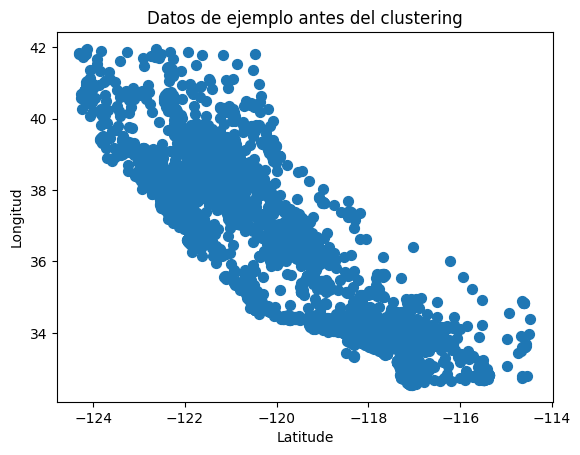

In [94]:
plt.scatter(X_train['Longitude'], X_train['Latitude'], s=50)
plt.title("Datos de ejemplo antes del clustering")
plt.xlabel("Latitude")
plt.ylabel("Longitud")
plt.show()

In [95]:
model = KMeans(n_clusters=6, random_state=21)
model.fit(X_train)

KMeans(n_clusters=6, random_state=21)

In [96]:
centroids = model.cluster_centers_
lables = model.labels_

print(centroids[:10])
print(lables[:10])

[[   4.06927404   33.87355787 -117.96602081]
 [   2.75010148   38.1295749  -121.62201637]
 [   5.42257353   37.67795426 -121.92724693]
 [   6.37598619   33.85781345 -118.04442156]
 [   2.32443201   34.08458091 -118.06375791]
 [  11.36978762   35.21302932 -119.5737785 ]]
[4 2 0 1 4 0 3 1 1 0]


In [109]:
X_train['cluster'] = lables

X_train

,MedInc,Latitude,Longitude,cluster
12055,2.3036,33.88,-117.57,4
10018,5.2359,39.23,-121.20,2
3794,4.4122,34.16,-118.37,0
162,3.6750,37.81,-122.24,1
13436,2.3682,34.09,-117.44,4
...,...,...,...,...
16432,3.9500,38.12,-121.23,1
8964,5.1322,33.99,-118.39,0
5944,4.0023,34.13,-117.88,0
5327,3.6673,34.04,-118.45,0


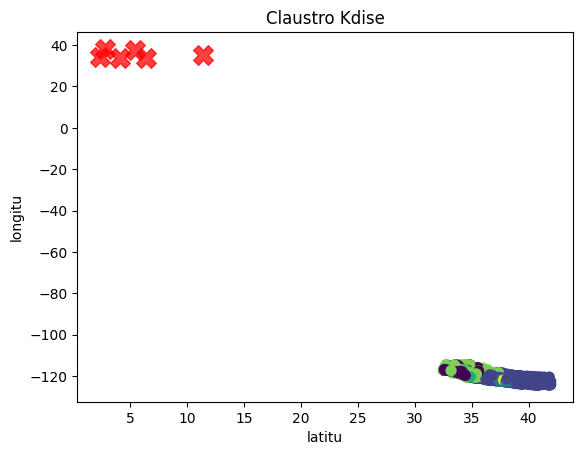

In [104]:
# visualisasion

plt.scatter(X_train['Latitude'], X_train['Longitude'], c=lables, s=50, cmap = 'viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, alpha=0.75, marker='X')

plt.title("Claustro Kdise")
plt.xlabel('latitu')
plt.ylabel('longitu')
plt.show()

In [107]:
predisione = model.predict(X_test) 

predisione

array([5, 5, 0, ..., 2, 2, 5])

In [110]:
X_test['cluster'] = predisione

X_test

,MedInc,Latitude,Longitude,cluster
18726,1.6033,40.58,-122.30,5
1046,2.5250,38.38,-120.72,5
15508,4.2357,33.14,-117.08,0
828,5.6400,37.62,-122.08,1
19007,2.4330,38.36,-121.98,5
...,...,...,...,...
17027,6.1004,37.51,-122.29,1
19373,3.7031,37.81,-120.90,5
6129,3.5625,34.08,-117.99,2
5466,3.0150,33.99,-118.47,2


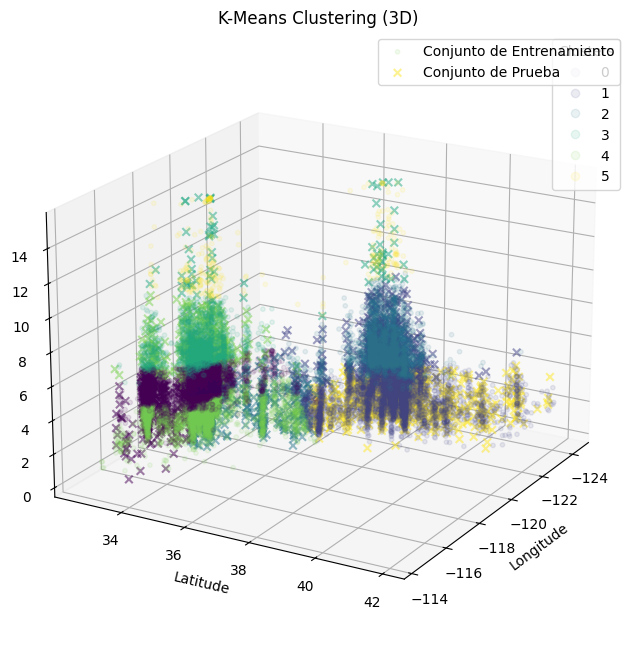

In [111]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
# Scatter plot para el conjunto completo (X_train)
scatter = ax.scatter(X_train['Longitude'], X_train['Latitude'], X_train['MedInc'], 
                     c=X_train['cluster'], cmap='viridis', s=10, label='Conjunto de Entrenamiento', alpha=0.1)
# Scatter plot para el conjunto de prueba (X_test)
# Asumiendo que X_test tiene las mismas columnas y una columna 'cluster' para el color
scatter_test = ax.scatter(X_test['Longitude'], X_test['Latitude'], X_test['MedInc'], 
                          c=X_test['cluster'], cmap='viridis', marker='x', s=30, label='Conjunto de Prueba', alpha=0.5)
ax.set_title('K-Means Clustering (3D)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('MedInc')
# Ángulo de vista
ax.view_init(elev=20, azim=30)
# Leyenda
legend = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend)
# Agregar leyenda para el conjunto de prueba
plt.legend(loc='upper right')
plt.show()

In [119]:
X = pd.concat((X_train, X_test), axis=0)


X.head()


,MedInc,Latitude,Longitude,cluster
12055,2.3036,33.88,-117.57,4
10018,5.2359,39.23,-121.20,2
3794,4.4122,34.16,-118.37,0
162,3.6750,37.81,-122.24,1
13436,2.3682,34.09,-117.44,4


In [120]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20640 entries, 12055 to 17547
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MedInc     20640 non-null  float64
 1   Latitude   20640 non-null  float64
 2   Longitude  20640 non-null  float64
 3   cluster    20640 non-null  int32  
dtypes: float64(3), int32(1)
memory usage: 725.6 KB
